# 04. Camera Geometry and Calibration
-   **Nama:** Muhammad Neo Cicero Koda
-   **NIM:** 13522108
-   **Fitur Unik:** Simulasi transformasi sederhana grid.

In [1]:
import cv2
import numpy as np
import pandas as pd
from skimage import data
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import os

os.makedirs('output', exist_ok=True)

print("Libraries imported successfully.")

Libraries imported successfully.


Loaded checkerboard.png: (200, 200)


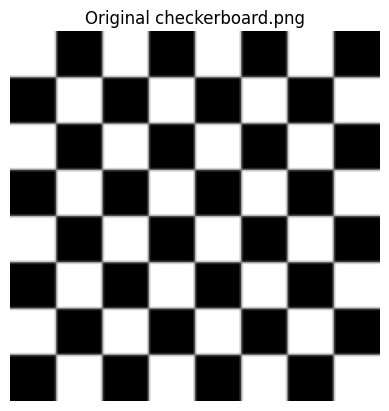

In [2]:
# Load image
img_raw = data.checkerboard()
img_u8 = img_as_ubyte(img_raw)
img_color = cv2.cvtColor(img_u8, cv2.COLOR_GRAY2BGR)
print(f"Loaded checkerboard.png: {img_u8.shape}")

plt.imshow(img_u8, cmap='gray')
plt.title('Original checkerboard.png')
plt.axis('off')
plt.show()

In [3]:
# Process homography
h, w = img_u8.shape

# Define source and destination points for homography
src_pts = np.float32([
    [0, 0],
    [w-1, 0],
    [w-1, h-1],
    [0, h-1]
])

dst_pts = np.float32([
    [w*0.15, h*0.1],
    [w*0.8, h*0.15],
    [w*0.9, h-1],
    [w*0.2, h*0.8]
])

H, _ = cv2.findHomography(src_pts, dst_pts)

img_warped = cv2.warpPerspective(img_color, H, (w, h))

cv2.imwrite('output/checkerboard_warped.png', img_warped)
np.savetxt('output/homography_matrix.txt', H, fmt='%.6f')

print("Homography transformation complete.")

Homography transformation complete.


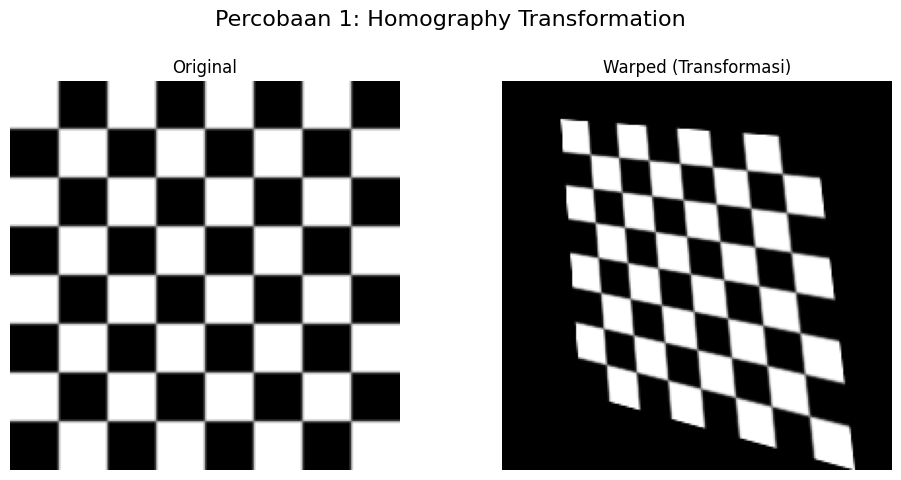

--- Homography Matrix (H) ---
[[ 5.24299821e-01  4.04997013e-02  3.00000000e+01]
 [ 2.60700355e-02  6.64511368e-01  2.00000000e+01]
 [-8.06040693e-04 -2.43788874e-04  1.00000000e+00]]

Matrix disimpan ke 'output/homography_matrix.txt'
Matrix juga disimpan ke 'output/homography_matrix.csv'


,h1,h2,h3
r1,0.524300,0.040500,30.0
r2,0.026070,0.664511,20.0
r3,-0.000806,-0.000244,1.0


In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Percobaan 1: Homography Transformation', fontsize=16)

ax[0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(img_warped, cv2.COLOR_BGR2RGB))
ax[1].set_title('Warped (Transformasi)')
ax[1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("--- Homography Matrix (H) ---")
print(H)

np.savetxt('output/homography_matrix.txt', H, fmt='%.6f')
print("\nMatrix disimpan ke 'output/homography_matrix.txt'")

df_homography = pd.DataFrame(H, columns=['h1', 'h2', 'h3'], index=['r1', 'r2', 'r3'])
df_homography.to_csv('output/homography_matrix.csv')
print("Matrix juga disimpan ke 'output/homography_matrix.csv'")

display(df_homography)